# MATPLOTLIB

This notebook covers below mentioned topics of visualization by Matplotlib package

* Line plot
* Scatter plot
* Histograms
* Scale Transformation
* Labels/Ticks/Sizes/Colors

## Line Plot

With matplotlib, you can create a bunch of different plots in Python. The most basic plot is the line plot. A general recipe is given here.

```python
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()
```

In the video, you already saw how much the world population has grown over the past years. Will it continue to do so? The world bank has collected the world population for the years 1964 up to 2013. Let's see trend of world population

In [1]:
#loading required packages
import pandas as pd
import matplotlib.pyplot as plt

Read CSV file from system and It is imporatant to make a copy of data first. as in future if we corrupt the df by accident then we must have a copy to read data. 

In [2]:
# loading dataset
data=pd.read_csv('gapminder.csv')
df=data.copy()
df.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


Check the first 5 rows

In [3]:
df.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


Display all column names 

In [4]:
df.columns

Index(['Country', 'Year', 'fertility', 'life', 'population', 'child_mortality',
       'gdp', 'region'],
      dtype='object')

In [5]:
#changing columns names
df.columns = ['country', 'year', 'fertility', 'life_exp', 'pop', 'child_mortality','gdp', 'region']
df.head()

,country,year,fertility,life_exp,pop,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


Group of dataframe on column **year** and then sum of this group on **pop** with reset_index() and assign to **df_popworld**

In [6]:
# Aggregating population on year
df_popworld=df.groupby(['year'])['pop'].sum().reset_index()
df_popworld.head()

,year,pop
0,1964,3.268989e+09
1,1965,3.333022e+09
2,1966,3.400742e+09
3,1967,3.471753e+09
4,1968,3.545277e+09


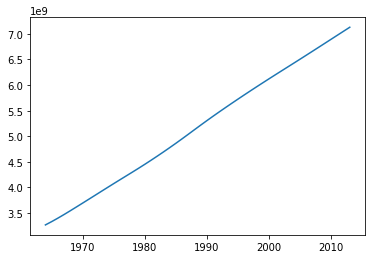

In [7]:
# Make a line plot: year on the x-axis, pop on the y-axis
year=df_popworld['year']
pop=df_popworld['pop']
plt.plot(year,pop)

# Display the plot with plt.show() IT HELPS IN FLUSHING THE MEMORY
plt.show()

Now that you've built your first line plot, let's start working on the data that professor Hans Rosling used to build his beautiful bubble chart. It was collected in 2007. Two lists are available for you:

* <mark>life_exp</mark> which contains the life expectancy for each country and
* <mark>gdp</mark>, which contains the GDP per capita (i.e. per person) for each country expressed in US Dollars.

GDP stands for Gross Domestic Product. It basically represents the size of the economy of a country. Let's see how life_exp and gdp_cap seems like.

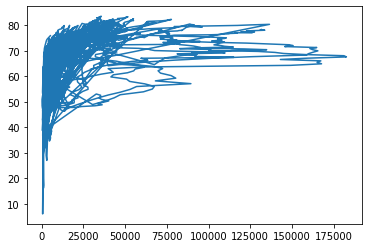

In [8]:
# Make a line plot, gdp_cap on the x-axis, life_exp on the y-axis
plt.plot(df['gdp'],df['life_exp'])
plt.show()

## Scatter Plot

When you have a time scale along the horizontal axis, the line plot is your friend. But in many other cases, when you're trying to assess if there's a correlation between two variables, for example, the scatter plot is the better choice. Below is an example of how to build a scatter plot.

```python
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()
```
Let's continue with the gdp_cap versus life_exp plot, the GDP and life expectancy data for Zimbabwe. Maybe a scatter plot will be a better alternative?

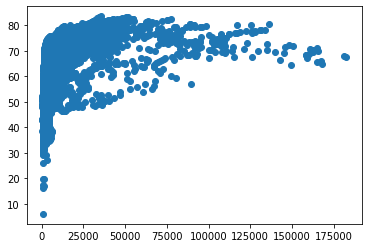

In [9]:
# Make a scatter plot, gdp_cap on the x-axis, life_exp on the y-axis
plt.scatter(df['gdp'],df['life_exp'])
plt.show()

Are you able to get some insights out of this scatter plot? Nope, right?

Let's transform GDP on x-axis to logarithmic scale!

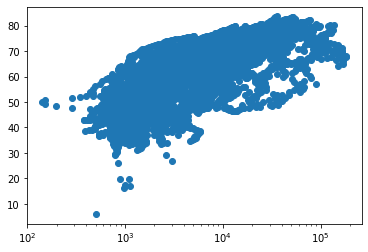

In [10]:
# Put the x-axis on a logarithmic scale
plt.scatter(df['gdp'],df['life_exp'])
plt.xscale('log')
plt.show()

In the previous exercise, you saw that that the higher GDP usually corresponds to a higher life expectancy. In other words, there is a positive correlation.

Do you think there's a relationship between population and life expectancy of a country in 2011?

In [11]:
df_2011 = df[df['year']==2011]

Make a scatter plot on **pop** and **life_exp** of **df_2011**

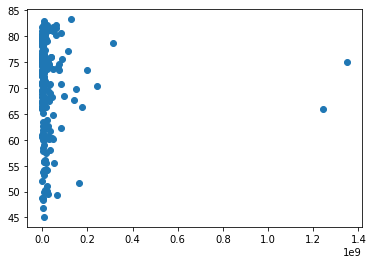

In [12]:
# Build scatter plot of pop vs life_exp
plt.scatter(df_2011['pop'],df_2011['life_exp'])
plt.show()

Make a scatter plot on **pop** and **life_exp** of **df_2011** with log on xscale   
**xscale('log')** A logarithmic scale is a nonlinear scale used when there is a large range of quantities. Common uses include earthquake strength, sound loudness, light intensity, and pH of solutions. ... Logarithmic scales are also used in slide rules for multiplying or dividing numbers by adding or subtracting lengths on the scales.

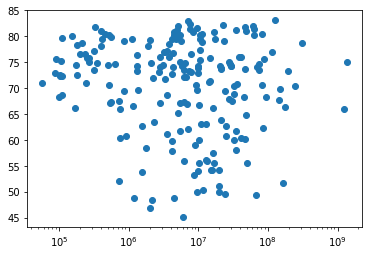

In [13]:
# Build scatter plot of pop vs life_exp with log
plt.scatter(df_2011['pop'],df_2011['life_exp'])
plt.xscale('log')
plt.show()

![Alt text]( https://media.tenor.com/images/cec959c552c36ddd244f61c496c5f9c3/tenor.gif)

## Histogram

To see how life expectancy in different countries is distributed in 2011, let's create a histogram of <mark>life_exp</mark>.

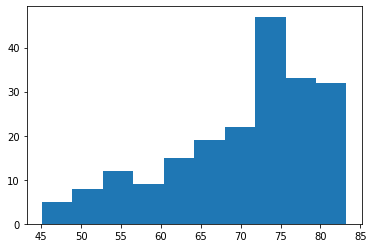

In [14]:
# Create histogram of life_exp data
plt.hist(df_2011['life_exp'])

# Display histogram
plt.show()

In the previous exercise, you didn't specify the number of bins. By default, Python sets the number of bins to 10 in that case. The number of bins is pretty important. Too few bins will oversimplify reality and won't show you the details. Too many bins will overcomplicate reality and won't show the bigger picture.

To control the number of bins to divide your data in, you can set the bins argument.

That's exactly what you'll do in this exercise. You'll be making two plots here. The code in the script already includes <mark>plt.show()</mark> and <mark>plt.clf()</mark> calls; <mark>plt.show()</mark> displays a plot; <mark>plt.clf()</mark> cleans it up again so you can start afresh.

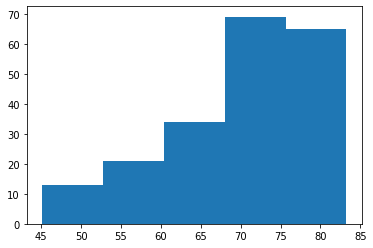

In [15]:
# Build histogram with 5 bins
plt.hist(df_2011['life_exp'], bins=5)

# Show
plt.show()

Plot a Histogram of **life_exp** with **20 bins**

In [16]:
# Build histogram with 20 bins



containing similar data for **1964** and assign to **df_1964**

In [17]:
#write code here


In the video, you saw population pyramids for the present day and for the future. Because we were using a histogram, it was very easy to make a comparison.

Let's do a similar comparison. life_exp contains life expectancy data for different countries in 2011. You also have access to a second list now, containing similar data for 1964

NameError: name 'df_1964' is not defined

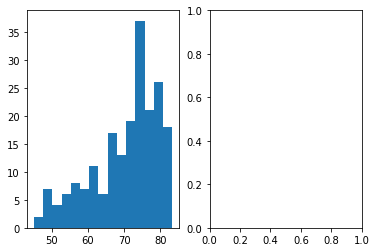

In [18]:
# Subplot1
plt.subplot(1,2,1)

# Build histogram with 15 bins
plt.hist(df_2011['life_exp'], bins=15)

# Subplot2
plt.subplot(1,2,2)

# Build histogram of life_exp in 1964 with 15 bins
plt.hist(df_1964['life_exp'], bins=15)
plt.show()

In [ ]:
plt.hist(df_2011['life_exp'], bins=15)
plt.hist(df_1964['life_exp'], bins=15)
plt.show()

In [ ]:
# Specify figure size
plt.figure(figsize=(15,5))

# Subplot1
plt.subplot(1,2,1)

# Build histogram with 15 bins
plt.hist(df_2011['life_exp'], bins=15)
plt.title('2011')


# Subplot2
plt.subplot(1,2,2)

# Build histogram of life_exp in 1964 with 15 bins
plt.hist(df_1964['life_exp'], bins=15)
plt.title('1964')
plt.show()

**Exercise**   
Check if life expectancy is increasing with years or not

In [ ]:
#write code here



In [ ]:
#write code here



## Labels

It's time to customize your own plot. This is the fun part, you will see your plot come to life!

You're going to work on the scatter plot with world development data: GDP per capita on the x-axis (logarithmic scale), life expectancy on the y-axis. 

As a first step, let's add axis labels and a title to the plot. You can do this with the <mark>**xlabel('GDP per Capita [in USD]')**</mark>, <mark>**ylabel('Life Expectancy [in years]')**</mark> and <mark>**title('World Development')**</mark> functions, available in matplotlib.pyplot. This sub-package is already imported as plt.

In [ ]:
# Build scatter plot

plt.scatter(df['gdp'],df['life_exp'])
plt.xscale('log')
# Add axis labels
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expentancy [in years]')

# Add title
plt.title('World Development')

# After customizing, display the plot
plt.show()

## Ticks

The customizations you've coded up to now are available in the script, in a more concise form.

In the video, Filip has demonstrated how you could control the y-ticks by specifying two arguments:
```python
plt.yticks([0,1,2], ["one","two","three"])
```
In this example, the ticks corresponding to the numbers 0, 1 and 2 will be replaced by one, two and three, respectively.

Let's do a similar thing for the x-axis of your world development chart, with the <mark>xticks()</mark> function. The tick values 1000, 10000 and 100000 should be replaced by 1k, 10k and 100k. To this end, two lists have already been created for you: <mark>tick_val</mark> and <mark>tick_lab</mark>.

In [ ]:
# Build scatter plot
plt.scatter(df_2011['gdp'],df_2011['life_exp'])

plt.xscale('log')
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2011')

# Definition of tick_val and tick_lab

tick_val=[1000,10000,100000]
tick_lab=['1K','10K','100K']

# Adapt the ticks on the x-axis

plt.xticks(tick_val,tick_lab)

# After customizing, display the plot

plt.show()

## Sizes

Right now, the scatter plot is just a cloud of blue dots, indistinguishable from each other. Let's change this. Wouldn't it be nice if the size of the dots corresponds to the population? Let's do it for 2011.

Display first 5 rows of **df_2011**

In [ ]:
#write code here



In [ ]:
#Import numpy library
import numpy as np

# Store pop as a numpy array: np_pop
df_2011['pop_mill']=df_2011['pop']/1000000
np_pop = df_2011['pop_mill']

# Double np_pop
np_pop = np_pop * 2

In [ ]:
# Previous customization

plt.scatter(df_2011['gdp'],df_2011['life_exp'], s=np_pop) #TODO #add size in scatter arguments
plt.xscale('log')
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2011')
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val,tick_lab)

# Show plot
plt.show()

## Colors

The code you've written up to now is available in the script on the right.

The next step is making the plot more colorful! To do this, a list col has been created for you. It's a list with a color for each corresponding region, depending on the continent the country is part of.

How did we make the list <mark>col</mark> you ask? The Gapminder data contains a list regions with the region each country belongs to. A dictionary is constructed that maps continents onto colors:
```python
dict = {
    'South Asia':'red',
    'Europe & Central Asia':'green',
    'Middle East & North Africa':'blue',
    'Sub-Saharan Africa':'yellow',
    'America':'orange',
    'East Asia & Pacific':'black'
}
```

display unique values of column name **region**

In [ ]:
#write code here


In [ ]:
col = {'South Asia':'red','Europe & Central Asia':'green','Middle East & North Africa':'blue','Sub-Saharan Africa':'yellow',
       'America':'orange','East Asia & Pacific':'black'}


In [ ]:
df_2011['col']=df_2011['region'].map(col)

In [ ]:
df_2011.head()

In [ ]:
# Specify c and alpha inside plt.scatter()
plt.scatter(df_2011['gdp'],df_2011['life_exp'], s=np_pop, c= df_2011['col'],alpha =0.7) 

# Previous customization
plt.xscale('log')
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2011')
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val,tick_lab)

# Show plot
plt.show()

## Figure Size

In [ ]:
# Specify figure size

plt.figure(figsize=(15,5))

# Build scatter plot with previous customizations
plt.scatter(df_2011['gdp'],df_2011['life_exp'], s=np_pop, c=df_2011['col'],alpha=0.7) #TODO #add color arguments

# Previous customization
plt.xscale('log')
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2011')
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val,tick_lab)

# Show plot
plt.show()

## Additional Customizations

In [ ]:
#  figure size
plt.figure(figsize=(13,7))

# scatter plot
plt.scatter(df_2011['gdp'],df_2011['life_exp'], s=np_pop, c=df_2011['col'], alpha=0.7)

# Previous customization
plt.xscale('log')
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2011')
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val,tick_lab)

# Additional customizations

plt.text(4050,69,'India')
plt.text(8700,78.5,'China')
plt.grid(True)
# Show plot
plt.show()

# Quick Exercise!

Build scatter plot of GDP per Capita vs Life Expentancy for year 1970 and specify Pakistan, UAE and UK.

In [ ]:
#write code here


In [ ]:
#write code here


In [ ]:
#write code here
